In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory





In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset) 

68

In [8]:
68*32

2176

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 2 1 1 2 1 1 1 1]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[134. 125. 130.]
  [140. 131. 136.]
  [144. 135. 140.]
  ...
  [157. 147. 146.]
  [100.  90.  89.]
  [105.  95.  94.]]

 [[146. 137. 142.]
  [148. 139. 144.]
  [137. 128. 133.]
  ...
  [131. 121. 120.]
  [155. 145. 144.]
  [100.  90.  89.]]

 [[143. 134. 139.]
  [172. 163. 168.]
  [134. 125. 130.]
  ...
  [117. 107. 106.]
  [144. 134. 133.]
  [118. 108. 107.]]

 ...

 [[169. 164. 168.]
  [169. 164. 168.]
  [168. 163. 167.]
  ...
  [155. 149. 151.]
  [154. 148. 150.]
  [153. 147. 149.]]

 [[167. 162. 166.]
  [167. 162. 166.]
  [167. 162. 166.]
  ...
  [156. 150. 152.]
  [155. 149. 151.]
  [153. 147. 149.]]

 [[167. 162. 166.]
  [168. 163. 167.]
  [167. 162. 166.]
  ...
  [155. 149. 151.]
  [153. 147. 149.]
  [151. 145. 147.]]], shape=(256, 256, 3), dtype=float32)


In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[104.  92. 102.]
  [124. 112. 122.]
  [102.  90. 100.]
  ...
  [174. 168. 178.]
  [175. 169. 179.]
  [176. 170. 180.]]

 [[109.  97. 107.]
  [119. 107. 117.]
  [ 98.  86.  96.]
  ...
  [171. 165. 175.]
  [172. 166. 176.]
  [173. 167. 177.]]

 [[119. 107. 117.]
  [116. 104. 114.]
  [104.  92. 102.]
  ...
  [171. 165. 175.]
  [171. 165. 175.]
  [172. 166. 176.]]

 ...

 [[104.  96. 117.]
  [104.  96. 117.]
  [107.  99. 120.]
  ...
  [167. 168. 188.]
  [167. 168. 188.]
  [166. 167. 187.]]

 [[112. 104. 125.]
  [113. 105. 126.]
  [116. 108. 129.]
  ...
  [165. 166. 186.]
  [164. 165. 185.]
  [164. 165. 185.]]

 [[115. 107. 128.]
  [112. 104. 125.]
  [110. 102. 123.]
  ...
  [166. 167. 187.]
  [165. 166. 186.]
  [164. 165. 185.]]]


In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


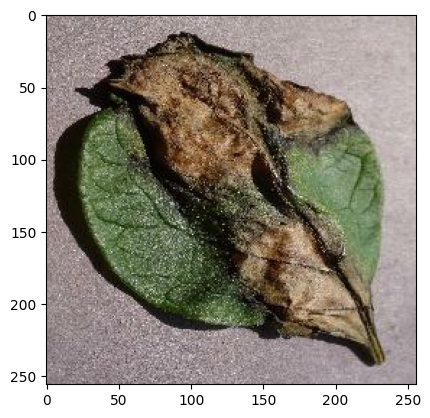

In [13]:
for image_batch, label_batch in dataset.take(1):

    plt.imshow(image_batch[0].numpy().astype("uint8"))

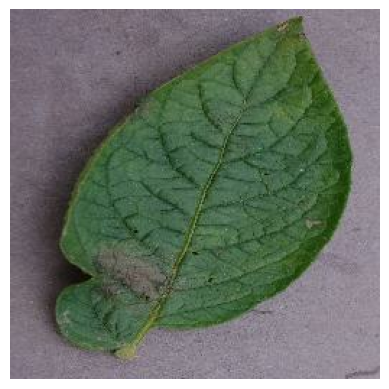

In [14]:
for image_batch, label_batch in dataset.take(1):

    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

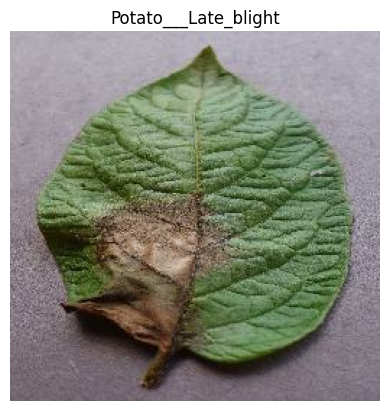

In [15]:
for image_batch, label_batch in dataset.take(1):

    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

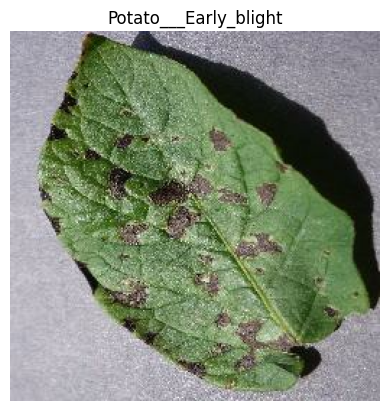

In [16]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

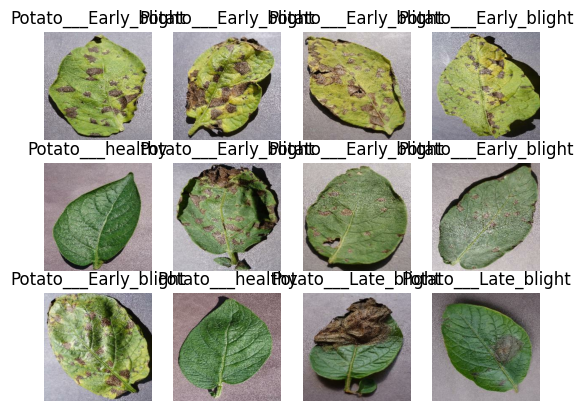

In [17]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

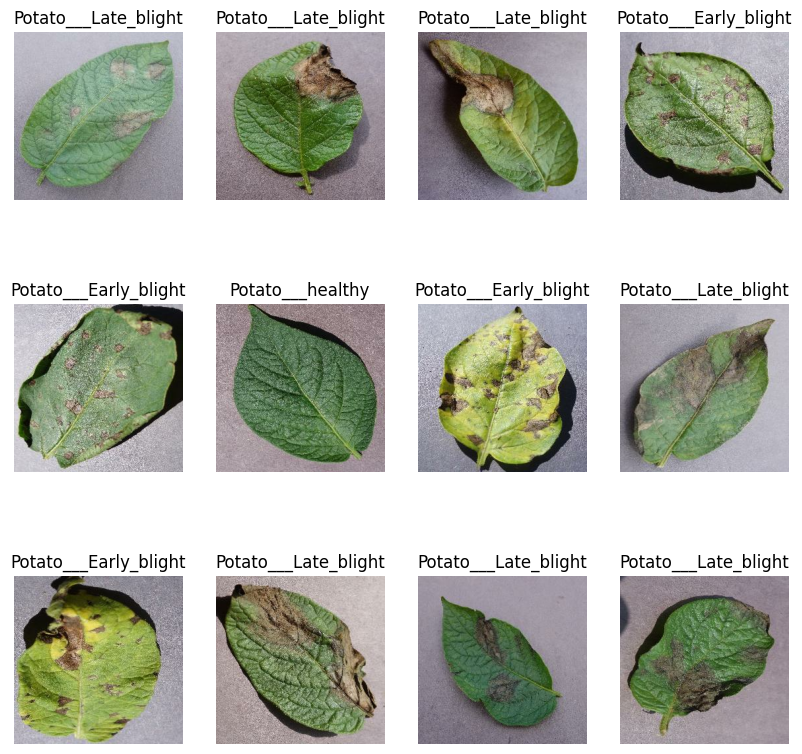

In [18]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [19]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [21]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [22]:
train_ds= dataset.take(54)
len(train_ds)

54

In [23]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [24]:
val_size=0.1 
len(dataset)*val_size 

6.800000000000001

In [25]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [26]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [27]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [28]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [29]:
len(train_ds)

54

In [30]:
len(val_ds)

6

In [31]:
len(test_ds)

8

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])



In [34]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [37]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


In [38]:
model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),

    layers.RandomFlip(mode="horizontal_and_vertical"),
    layers.RandomRotation(factor=0.2),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4556 - loss: 2.1794 - val_accuracy: 0.7743 - val_loss: 0.6322
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8530 - loss: 0.4851 - val_accuracy: 0.7911 - val_loss: 0.5502
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8355 - loss: 0.4371 - val_accuracy: 0.8681 - val_loss: 0.3299
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8867 - loss: 0.2996 - val_accuracy: 0.8501 - val_loss: 0.3684
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8953 - loss: 0.2809 - val_accuracy: 0.8941 - val_loss: 0.2498
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8894 - loss: 0.2398 - val_accuracy: 0.9010 - val_loss: 0.2444
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8884 - loss: 0.2821 - val_accuracy: 0.8588 - val_loss: 0.3939
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8705 - loss: 0.2895 - val_accuracy: 0.9097 - val_loss:

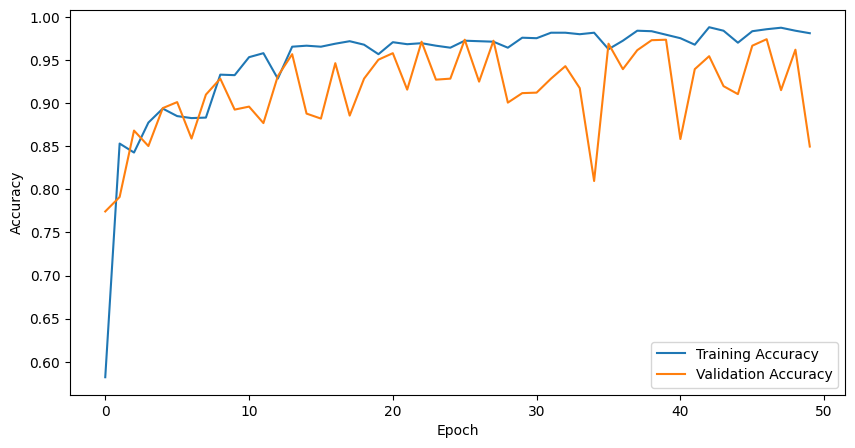

In [41]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

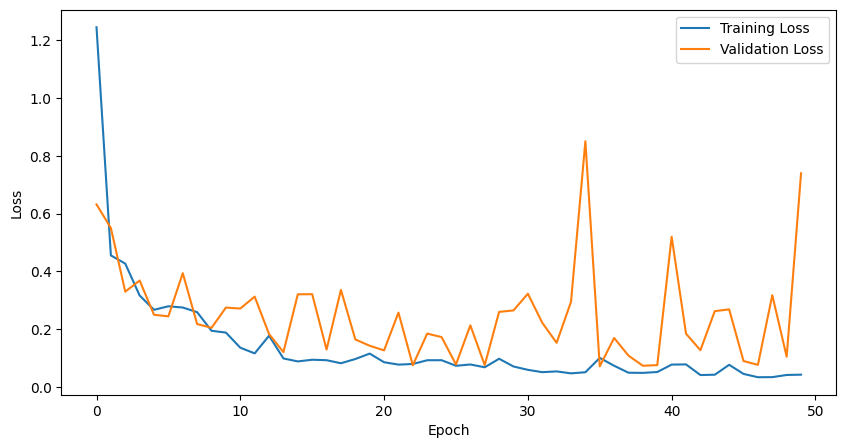

In [42]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Path ke direktori dataset test
test_dataset_dir = "C:/Users/ASUS/potato-diseasee/training/PlantVillage"  # Sesuaikan dengan path ke dataset test Anda

# Muat dataset test dari direktori dengan batch size 8 (sesuaikan dengan jumlah sampel)
test_ds = image_dataset_from_directory(
    test_dataset_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,  # Sesuaikan batch size agar sesuai dengan jumlah sampel test yang Anda miliki
    label_mode='int'
)


Found 2152 files belonging to 3 classes.


In [43]:
# Evaluasi model terhadap dataset test (test_ds) dan output hasil evaluasi
scores = model.evaluate(test_ds)


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.8500 - loss: 0.7926


In [44]:
scores

[0.7399155497550964, 0.8495370149612427]

In [45]:
history

In [46]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 54}

In [47]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [48]:
len(history.history['accuracy'])

50

In [49]:
history.history['accuracy']

[0.5821759104728699,
 0.8530092835426331,
 0.8425925970077515,
 0.8773148059844971,
 0.8935185074806213,
 0.8848379850387573,
 0.8825231194496155,
 0.8831018805503845,
 0.9328703880310059,
 0.9322916865348816,
 0.953125,
 0.9577546119689941,
 0.9282407164573669,
 0.9652777910232544,
 0.9664351940155029,
 0.9652777910232544,
 0.96875,
 0.9716435074806213,
 0.9675925970077515,
 0.9565972089767456,
 0.9704861044883728,
 0.9681712985038757,
 0.9693287014961243,
 0.9664351940155029,
 0.9641203880310059,
 0.9722222089767456,
 0.9716435074806213,
 0.9710648059844971,
 0.9641203880310059,
 0.9756944179534912,
 0.9751157164573669,
 0.9814814925193787,
 0.9814814925193787,
 0.9797453880310059,
 0.9814814925193787,
 0.9623842835426331,
 0.9722222089767456,
 0.9837962985038757,
 0.9832175970077515,
 0.9791666865348816,
 0.9751157164573669,
 0.9675925970077515,
 0.9878472089767456,
 0.9837962985038757,
 0.9699074029922485,
 0.9832175970077515,
 0.9855324029922485,
 0.9872685074806213,
 0.9837962985

In [50]:
# Mengumpulkan data dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [52]:
# Collect data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [53]:
# Plotting
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

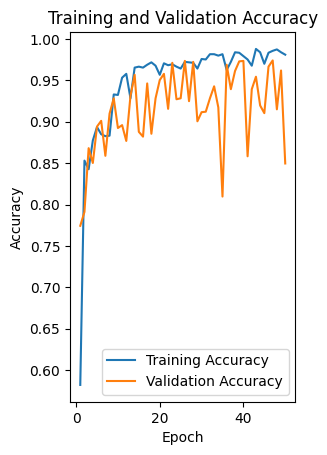

In [54]:
# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), acc, label='Training Accuracy')
plt.plot(range(1, EPOCHS + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

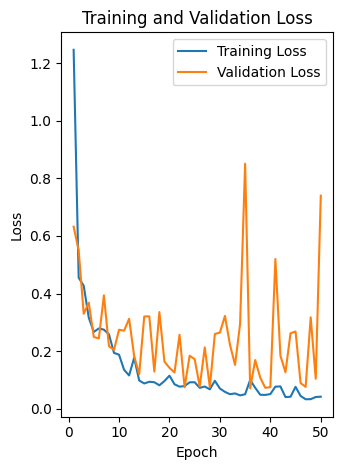

In [55]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss')
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [57]:
import numpy as np

# Menggunakan np.argmax untuk menemukan indeks dari nilai maksimum dalam array
max_index = np.argmax([9.9999964e-01, 3.9333537e-07, 1.1586251e-18])
print(max_index)


0


first image to predict
actual label: potato late blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
prediction label: potato late blight


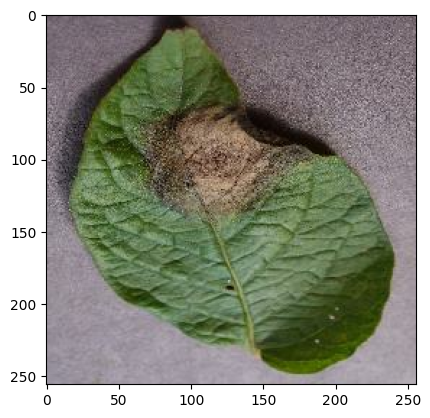

In [58]:
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("prediction label:",class_names[np.argmax(batch_prediction[0])])


In [59]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


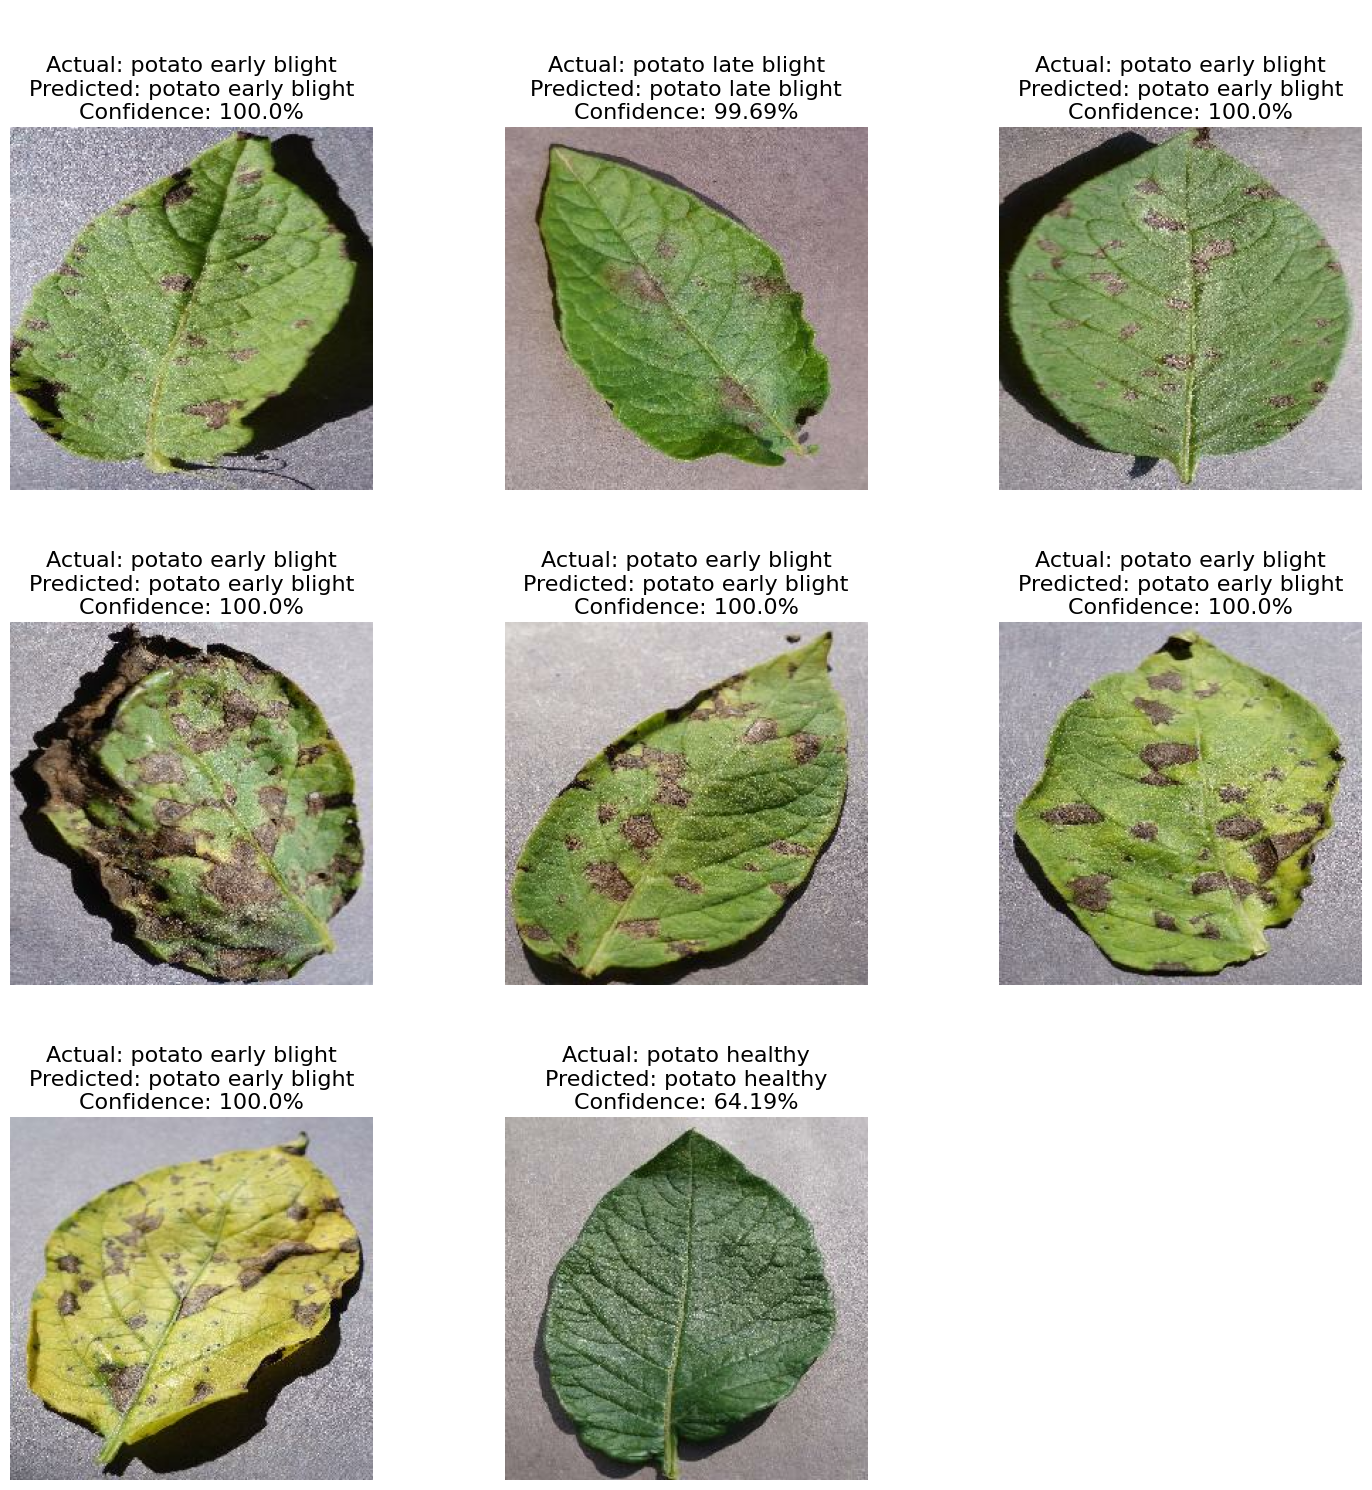

In [60]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(8):  # Ubah range menjadi 8 karena batch memiliki 8 elemen
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"\n\nActual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%", fontsize=16)  # Menambahkan fontsize=16 untuk memperbesar teks
        plt.axis("off")
        
plt.tight_layout()  # Menyesuaikan tata letak plot
plt.show()




In [63]:
import os
import re
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# Path ke direktori penyimpanan model
model_dir = "C:/xampp/htdocs/potato-diseasee/models"
os.makedirs(model_dir, exist_ok=True)

# List files di direktori model dan ekstrak versi numeriknya dari nama file
model_files = os.listdir(model_dir)
model_versions = []

for file in model_files:
    match = re.match(r"model_(\d+)\.keras", file)
    if match:
        model_versions.append(int(match.group(1)))

# Tentukan nomor versi berikutnya
model_version = max(model_versions + [0]) + 1

print(f"Model version to be saved: {model_version}")

# Contoh: Load model yang ada atau definisikan model baru
# Jika Anda sudah memiliki model yang disimpan sebelumnya, load model tersebut
try:
    latest_model_version = max(model_versions)
    model = load_model(f"{model_dir}/model_{latest_model_version}.keras")
    print(f"Loaded existing model version {latest_model_version}")
except:
    # Jika belum ada model yang disimpan, buat model baru sebagai contoh
    model = Sequential([
        Input(shape=(28, 28)),  # Ganti Flatten dengan Input
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print("Created a new model")

# Simpan model dengan versi baru
model.save(f"{model_dir}/model_{model_version}.keras")
print(f"Model saved in version {model_version} at '{model_dir}/model_{model_version}.keras'")


Model version to be saved: 2
Loaded existing model version 1
Model saved in version 2 at 'C:/xampp/htdocs/potato-diseasee/models/model_2.keras'


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [64]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [ ]:
pip show tensorflow